In [38]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
  
# fetch dataset 
heartdisease = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
dataset = heartdisease.data.features 
y = heartdisease.data.targets 
  
# metadata
display(dataset) 
X = dataset["perimeter1"]

# variable information 



codes, uniques = pd.factorize(y["Diagnosis"])
y["Diagnosis"] = codes
display(y) 

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


C:\Users\mmich\AppData\Local\Temp\ipykernel_16972\2564019963.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Diagnosis"] = codes


,Diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [39]:
X = X.values.reshape(-1,1)
X.shape

(569, 1)

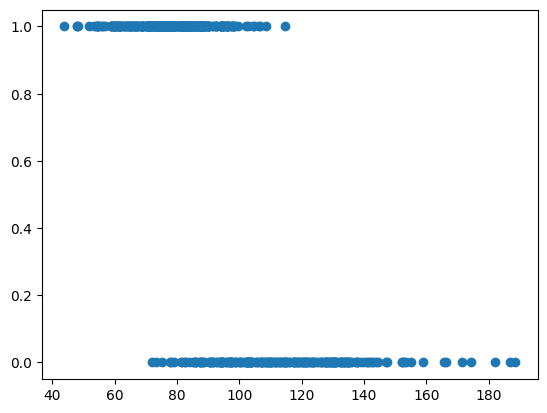

In [40]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [41]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticReg: 

    def __init__(self, lr = 0.01, epoch = 100):
        self.lr = lr
        self.epoch = epoch
        self.weights = None
        self.bias = None

    def sigmoid(self,z):
        return 1/ (1+np.exp(-z))

    def fit(self, X, y, debug=False):
        # M is the size of samples
        # N is the size of features

        m, n = X.shape
        self.weights = np.random.rand(n, 1)
        self.bias = np.random.rand(1)

        y = y.values.reshape(m,1)

        losses = list()
        b_list = list()
        w_list = list()

        for epoch in range(self.epoch):
            # Calculate prediction
            z = np.dot(X,self.weights) + self.bias
            #Sigmoide, adapta la linea que tiene rangos infinitos en y a tenerlos solo entre 0 y 1
            y_hat = self.sigmoid(z)
            # Save current loss (Log Loss o Cross-Entropy)
            #print(y_hat)
            loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
            losses.append(loss)
            # Calculate gradient
            dw = (1/m) * np.dot(X.T, (y_hat - y))
            db = (1/m) * np.sum(y_hat - y)
            # Update params
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
            # Save params
            w_list.append(self.weights)
            b_list.append(self.bias)
            if debug:
                print(f"epoch: {epoch}, loss: {loss}")

        if debug:
            plt.plot(range(self.epoch), losses)
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.title("Logistic Regression (Explicit Gradients)")
            plt.show()

    def predict(self, X, threshold=0.5,debug = False):
        z = np.dot(X, self.weights) + self.bias
        y_hat = self.sigmoid(z)
        y_pred = (y_hat >= threshold).astype(int)
        return y_pred

epoch: 0, loss: nan
epoch: 1, loss: 2.596830027486871
epoch: 2, loss: nan
epoch: 3, loss: 0.6402540276011043
epoch: 4, loss: 1.2779902396399707
epoch: 5, loss: 16.690625674511224
epoch: 6, loss: 6.40121503066553
epoch: 7, loss: 13.52039565178644
epoch: 8, loss: inf
epoch: 9, loss: 10.350674998041663
epoch: 10, loss: inf
epoch: 11, loss: 7.181017646336439
epoch: 12, loss: nan
epoch: 13, loss: 4.0141788151231745
epoch: 14, loss: nan
epoch: 15, loss: 1.081353572856092
epoch: 16, loss: nan
epoch: 17, loss: 4.084289310012573
epoch: 18, loss: nan
epoch: 19, loss: 1.1295387274457602
epoch: 20, loss: nan
epoch: 21, loss: 3.573856120190878
epoch: 22, loss: nan
epoch: 23, loss: 0.8306597855054706
epoch: 24, loss: inf
epoch: 25, loss: 8.34955976409699
epoch: 26, loss: inf
epoch: 27, loss: 5.180481374082948
epoch: 28, loss: nan
epoch: 29, loss: 2.0560709887035404
epoch: 30, loss: nan
epoch: 31, loss: 0.6504106779625407
epoch: 32, loss: 3.268202566375203
epoch: 33, loss: 17.055031486630742
epoch: 3

C:\Users\mmich\AppData\Local\Temp\ipykernel_16972\2903695569.py:36: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
C:\Users\mmich\AppData\Local\Temp\ipykernel_16972\2903695569.py:36: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))


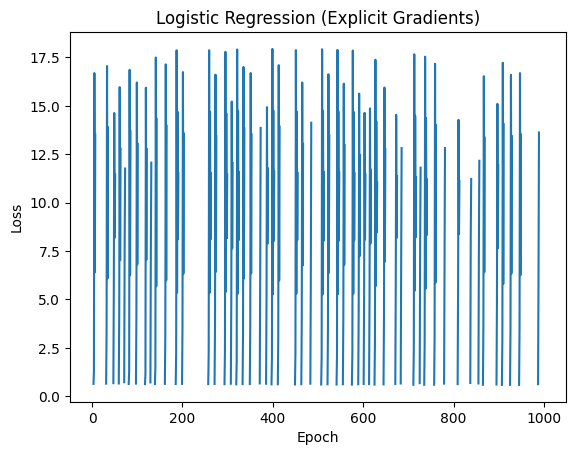

In [43]:
model = LogisticReg(.01,1000)
model.fit(X_train, y_train,True)
y_pred = model.predict(X_test, True)

X_test = np.array(X_test)
y_test = np.array(y_test)

X_test = X_test.ravel()
y_test = y_test.ravel()


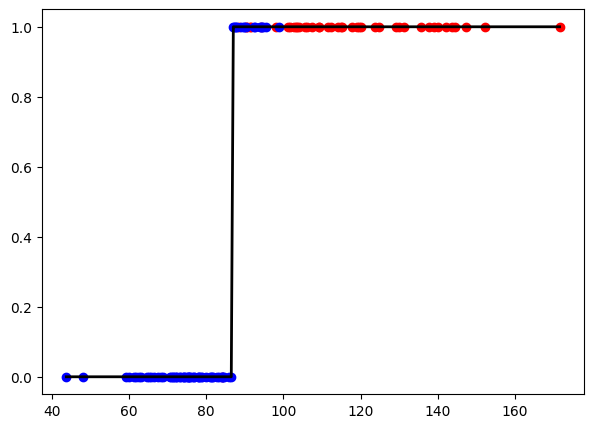

In [ ]:

X_sorted = np.sort(X_test, axis=0,)
y_prob = model.sigmoid(model.weights[0][0] * X_sorted + model.bias[0])

sort_idx = np.argsort(X_test)
X_sorted = X_test[sort_idx]
y_pred_sorted = y_pred[sort_idx]

plt.figure(figsize=(7,5))

plt.scatter(X_test[y_test==0], y_pred[y_test==0], color='red', label='Class 0')
plt.scatter(X_test[y_test==1], y_pred[y_test==1], color='blue', label='Class 1')

plt.plot(X_sorted, y_pred_sorted, color='black', linewidth=2, label='Sigmoid curve')
plt.show()